# COLLABORATIVE-BASED FILTERING USING K-MEANS

In [13]:
## importing neccessaries libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

In [14]:
# loding MovieLens dataset
ratings_data = pd.read_csv('ratings.csv')
movies_data = pd.read_csv('movies.csv')

In [15]:
ratings_data.head()  ## printing the ratings data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
movies_data.head()   ## printing the movies data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
# filter users with more than 10 ratings
user_ratings_count = ratings_data['userId'].value_counts()
active_users = user_ratings_count[user_ratings_count > 10].index
ratings_data_filtered = ratings_data[ratings_data['userId'].isin(active_users)]

In [18]:
# create user-item matrix with sparse representation
user_item_matrix = ratings_data_filtered.pivot_table(index='userId', columns='movieId', values='rating')
user_item_matrix = user_item_matrix.fillna(0)
user_item_sparse = csr_matrix(user_item_matrix.values)

In [19]:
# fitting K-Means clustering
k = 50  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
clusters = kmeans.fit_predict(user_item_sparse)

In [20]:
# recommend movies for a user based on similarity to other users in the same cluster
def recommend_movies(user_id, num_recommendations=5):
    user_cluster = clusters[user_id - 1]
    similar_users = np.where(clusters == user_cluster)[0]
    similar_users = similar_users[similar_users != user_id - 1]

    # compute cosine similarity between input user and other users in the cluster
    similarities = cosine_similarity(user_item_matrix.iloc[user_id - 1].values.reshape(1, -1),
                                      user_item_matrix.iloc[similar_users])

    # get indices of top similar users based on similarity score
    top_similar_users = np.argsort(similarities[0])[::-1][:num_recommendations]

    # get movies rated highly by the top similar users
    recommended_movies = user_item_matrix.iloc[similar_users[top_similar_users]].mean(axis=0)
    recommended_movies = recommended_movies.sort_values(ascending=False)[:num_recommendations]

    # get movie information from movies_data
    recommended_movies_info = movies_data[movies_data['movieId'].isin(recommended_movies.index)]

    return recommended_movies_info

In [21]:
## predicting for user id = 1
user_id = 1
recommendations = recommend_movies(user_id)

In [22]:
recommendations

,movieId,title,genres
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
900,1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
902,1200,Aliens (1986),Action|Adventure|Horror|Sci-Fi
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


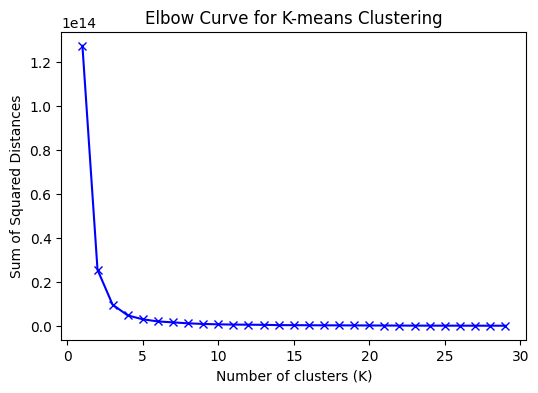

In [26]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')


movie_ratings = pd.merge(ratings, movies, on='movieId')

# prepare the data for clustering
X = movie_ratings[['userId', 'movieId', 'rating']]
K_values = range(1, 30)  # trying K from 1 to 30 clusters

# initialize an empty list to store the sum of squared distances for each K
sse = []

# perform K-means clustering for each K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # sum of squared distances to closest centroid

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(K_values, sse, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve for K-means Clustering')
plt.show()

In [ ]:
## Hence the optimum number of clusters = 10